# Home assignment 5

Please, rename the Jupyter Notebook that you will submit as ```Surname_assignment5.ipynb```, where instead of ```Surname``` you write your family name. A solution of every problem should be placed below of the corresponding problem statement.

After the running commands (Kernel -> Restart & Run All) all cells in your file have to run correctly. Please check this before submission.

## Problem 1 (4 pts)

- (2 pts) Prove that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal

- (2 pts) Show that for the function $f(x) = x^{\top}x$ the steepest gradient descent converges after one iteration using direct computations

# My solution:
**Problem 1.1 
Prove that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal**

$$
\alpha_k = \arg\min_{\alpha \geq 0} f(x_k - \alpha f'(x_k))
$$
$$
\alpha_k = \arg\min_{\alpha \geq 0} L(α), 
$$
$$
where: L(α) = f(x_k - \alpha f'(x_k))
$$
this means
$$
\nabla_{\alpha} L(α)= 0
$$
\begin{equation}
\frac{\partial L}{\partial x_{k+1}} \frac{\partial x_{k+1}}{\partial α} = 0
\end{equation}
where
\begin{equation}
\frac{\partial L}{\partial x_{k+1}} =\frac {\partial f(x_k - \alpha f'(x_k))}{\partial x_{k}} = ∇f(x_{k+1})
\end{equation}
and 
\begin{equation}
\frac{\partial x_{k+1}}{\partial α} =\frac {\partial (x_k - \alpha f'(x_k))} {\partial \alpha} = -∇f(x_k)
\end{equation}
then 
\begin{equation}
\frac{\partial L}{\partial x_{k+1}} \frac{\partial x_{k+1}}{\partial α} = - ∇f(x_{k+1}) ∇f(x_k) = 0
\end{equation}  
\begin{equation}
∇f(x_{k+1}) ∇f(x_k) = 0
\end{equation}  
this means that gradients, computed in two sequential points, generated by the steepest gradient descent, are orthogonal. $Q.E.D.$

**Problem 1.2 
Show that for the function $f(x) = x^{\top}x$  the steepest gradient descent converges after one iteration using direct computations**

\begin{equation}
f(x) = x^Tx
\end{equation}  
\begin{equation}
∇f(x) = 2x
\end{equation}  
\begin{equation}
∇f(x_{k+1}) ∇f(x_k) = 0
\end{equation}  
\begin{equation}
∇f(x_{k+1}) ∇f(x_k) = 2x_{k+1}∇f(x_k)=2(x_k-α2x_k))∇f(x_k)=0
\end{equation}  
\begin{equation}
⇒ α = \frac {1}{2}
\end{equation}  
\begin{equation}
x_1 = x_0 - \frac {1}{2}2x_0=0 
\end{equation}  
\begin{equation}
∇f(x_1) = 2x_1 = 0
\end{equation}  
⇒ The point $x_1=0$ is critical point and our function is quadratic 
 ⇒ convex and ⇒ point $x_1=0$ is a minimum point, and how can we see the steepest gradient descent converges after one iteration for our function.

## Problem 2 (10 pts)

- (6 pts) Solve the foloowing problem with the steepest gradient descent method

$$
\frac{1}{2}x^{\top}Ax - b^{\top}x \to \min_x
$$

where 

$$
A = 
\begin{bmatrix}
0.78 & −0.02 & −0.12 & −0.14\\
−0.02 & 0.86 & −0.04 & 0.06 \\
−0.12 & −0.04 & 0.72 & −0.08\\
−0.14 & 0.06 & −0.08 & 0.74
\end{bmatrix}
\qquad
b = \begin{bmatrix}
0.76\\
0.08\\
1.12\\
0.68
\end{bmatrix}
$$

and initial guess $x^0 = 0$ with tolerance of the gradient norm equal to $10^{-6}$. 

- (2 pts) Make convergence plot in terms of the decreasing of gradient norm and make a conclusion on the convergence speed 
- (2 pts) Find spectrum of the matrix $A$ with a proper ```numpy``` function and compare the derived convergence plot with theoretical upper bound. How is the theoretical upper bound tight?

# My Solution
**Problem 2.1**

- (6 pts) Solve the foloowing problem with the steepest gradient descent method

In [1]:
# Your solution is here
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcdefaults()

In [2]:
import numpy as np

A = np.array([
              [ 0.78, -0.02, -0.12, -0.14], 
              [-0.02,  0.86, -0.04,  0.06], 
              [-0.12, -0.04,  0.72, -0.08],
              [-0.14,  0.06, -0.08, 0.74]
              ])

b = np.array([0.76, 0.08, 1.12, 0.68])

In [3]:
# cvxpy  - for comparicon
import cvxpy as cvx
n = 100
print(cvx.installed_solvers())

x = cvx.Variable(4)

obj = cvx.Minimize(1/2 * cvx.quad_form(x, A) - b.T @ x)
prob = cvx.Problem(obj)
prob.solve()
x = x.value
print("Optimal value =", prob.value)

['CVXOPT', 'ECOS', 'ECOS_BB', 'GLPK', 'GLPK_MI', 'OSQP', 'SCS']
Optimal value = -2.174659550975341


In [4]:
# Steepest Gradient Descent

f = lambda x: 1/2*(x.T.dot(A)).T.dot(x)-b.T.dot(x) 
grad_f = lambda x: A.T.dot(x)- b

def SteepestGradientDescent(A, grad_f, x0, epsilon):
    norm_grad_list = []    
    x_list = []
    x = x0    
    grad =  grad_f(x)
    norm_gradfx = np.linalg.norm(grad)    
    while norm_gradfx > epsilon:                
        #  alfa = grad.T @ grad / grad.T @ A grad)))
        alfa = grad.T.dot(grad) / (grad.T.dot(A.T.dot(grad)))
        grad = grad_f(x)               
        x = x - alfa * grad        
        norm_gradfx = np.linalg.norm(grad)
        norm_grad_list.append(norm_gradfx)
        x_list.append(x)
    return x, norm_grad_list, x_list

x, normg, x_list = SteepestGradientDescent(A, grad_f, np.zeros(4), 1e-6)
print(f'x*={x}, f(x*)={f(x)}, Num of steps: {len(normg)}')

x*=[1.53496499 0.12200962 1.97515656 1.41295537], f(x*)=-2.174659550975329, Num of steps: 9


**Problem 2. 2.**

- (2 pts) Make convergence plot in terms of the decreasing of gradient norm and make a conclusion on the convergence speed 

We see on the plot that **convergence speed is linear**.

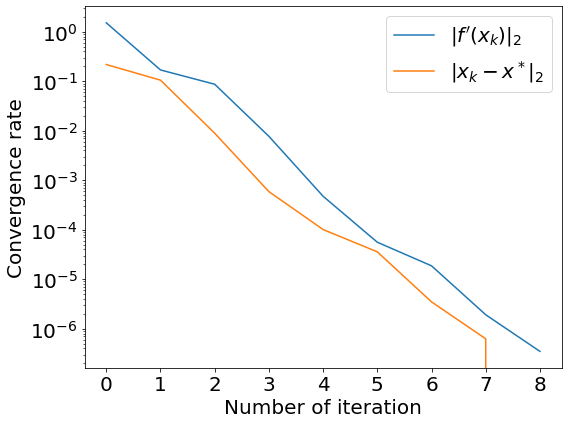

In [5]:
plt.figure(figsize=(8,6))
plt.semilogy(normg, label=r"$\| f'(x_k) \|_2$")
plt.semilogy([np.linalg.norm(x - np.array(x_k)) for x_k in x_list], label=r"$\|x_k - x^*\|_2$")
plt.xlabel(r"Number of iteration", fontsize=20)
plt.ylabel(r"Convergence rate", fontsize=20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(loc="best", fontsize=20)
plt.tight_layout()

**Problem 2.3**

- (2 pts) Find spectrum of the matrix $A$ with a proper ```numpy``` function and compare the derived convergence plot with theoretical upper bound. How is the theoretical upper bound tight?

In [6]:
w, _ = np.linalg.eig(A)
print(f'The spectrum of the matrix A: {w}')
print(f'\nNorm of xk-x* on step 8 = {np.linalg.norm(x_list[7]-x)}')

The spectrum of the matrix A: [0.52 0.94 0.88 0.76]

Norm of xk-x* on step 8 = 6.24779477528957e-07



And we know, that if convergence speed is linear, then we can estimate upper bound how:

$$
\| x_{k+1} - x^* \|_2 \leq Cq^k, 
$$

where $q \in (0, 1)$ and $ 0 < C < \infty$

$$
q = \frac{K-1} {K+1} = \frac {1.8-1} {1.8 + 1} ≈ 0.29 
$$
where k is an estimate of condition number of H.

In our case, we have 
$$
K ≈ \frac {max(eigenvalue A)} {min(eigenvalue A)} = \frac {0.94} {0.52} ≈ 1.8
$$
and let's С = 10, and we have k = 9

Then upper bound is: 
$$
Cq^k = 10* (0,29)^9 ≈ 10*10^{-5} ≈10^{-4}
$$
And for k = 8 (for k = 9 norma ≈ 0)
$$
\| x_{k} - x^* \|_2 ≈ 6*10^{-7} ≈ 10^{-6}
$$
From this, given that C was chosen arbitrarily and equal to 10, we can conclude that our convergence rate is not so much different from the upper bound.

## Problem 3 (16 pts)

- (1 pts) Consider the simple binary classification problem of data taken with [this utility](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). So the first step in this problem is downlowding the dataset and derive matrix $X \in \mathbb{R}^{m \times n}$ of given data and vector $y \in \mathbb{R}^m$ of labels. 
- Now to train the simple logistic regression model you need to solve the following optimization problem

$$ -\frac{1}{m} \sum_{i=1}^m (y_i \log(h(w, b | x_i)) + (1 - y_i)\log(1 - h(w, b | x_i))) \to \min_{w, b},$$

where $y_i$ is an $i$-th label, $x_i$ is an $i$-th row of the matrix $X$, $h(w, b | x_i) = \sigma(w^{\top}x_i + b)$ (here we use $x_i$ as a column vector) and $\sigma(z) = \frac{1}{1 + e^{-z}}$. This problem has two parameter $w \in \mathbb{R}^n$ and $b \in \mathbb{R}$. It is possible to incorporate them in the single vector, so if you want, you can consider them as a components of the single vector.
    
The explanation of the form of the objective function and related topics on how to measure the quality of the trained model will be discussed in the machine learning course.

- (5 pts) Implement the gradient of this objective function and compare your implementation with automatically computed gradient in JAX. Loops are prohibited in your implementation!
- (5 pts) Consider four constant step sizes $10^{-3}, 10^{-2}, 10^{-1}, 1$ and compare the convergence of the gradient descent for them. Also fix the initialization in every run. You should get three convergence plots and analyze them.
- (3 pts) Compare the obtained results with the results if Armijo rule to adapt the step size is used. Provide convergence plots and running time in seconds in all experiments.
-  (2 pts) Make a conclusion on the gain that can be established by the proper adaptive step size selection rules 


# My solution
**Problem 3.1**
- (1 pts) Consider the simple binary classification problem of data taken with [this utility](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html). So the first step in this problem is downlowding the dataset and derive matrix $X \in \mathbb{R}^{m \times n}$ of given data and vector $y \in \mathbb{R}^m$ of labels. 

In [7]:
# Your solution is here
import jax
import jax.numpy as jax_np
import numpy as np
import sklearn.datasets as skldata
from sklearn.datasets import load_breast_cancer

data = skldata.load_breast_cancer()
X = data['data']
Y = data['target']

data = load_breast_cancer()

**Problem 3.2**
This problem has two parameter  w∈Rn  and  b∈R . It is possible to incorporate them in the single vector, so if you want, you can consider them as a components of the single vector.

In [8]:
X.shape
# update X for incorporate w and b in the single vector
X = jax_np.c_[np.ones(X.shape[0]), X] 
# X = jax_np.concatenate((np.ones((d,1)), X), axis=1)
X.shape

(569, 31)

**Problem 3.3**
- (5 pts) Implement the gradient of this objective function and compare your implementation with automatically computed gradient in JAX. Loops are prohibited in your implementation!

**Gradient f:**
\begin{equation}
\sigma(wx) = \frac{1}{1+e^{-wx}}
\end{equation}
\begin{equation}
\sigma'_w = (1-\sigma)*\sigma)x
\end{equation}
\begin{equation}
\frac{\partial f}{\partial w_j} = - \frac{\partial [y log(\sigma)+(1-y) log (1-\sigma)]}{\partial w_j} = - \frac {y(1-σ) -(1-y)σ} {σ(1-σ)}\sigma' =
\end{equation}
\begin{equation} 
= - \frac {y -yσ - σ + yσ} {σ(1-σ)} (1-σ)σx_j = (σ-y)x_j
\end{equation}

\begin{equation} 
∇f_w = \frac {1} {m} \sum_{i=1}^m (σ(w^Tx_i)-y_i)x_i
\end{equation}

**Gradient jax and comparison:**

**Comparison:**
As we see below, the accuracy of the automatic gradient calculation with an accuracy of 10-5 does not differ from the calculation by the analytical formula. And the calculation time is formally longer in the JAX version, however, 
firstly, caching can affect real time, 
and secondly, the automated calculation procedure is obviously more profitable, since in most cases the calculation of an analytical expression can present significant difficulties.

In [9]:
# Your solution is here
import jax
import jax.numpy as jux_numpy
import sklearn.datasets as skldata

data = skldata.load_breast_cancer()
X = data['data']
Y = data['target']

# normaize X
X = X / X.max(axis=0)

#  incorporate w and b in one vector
X = jux_numpy.c_[np.ones(X.shape[0]), X]
np.random.seed(0)
W = np.random.uniform(0, 1, X.shape[1])

def sigmoid(w, x):
  return 1 / (1 + jux_numpy.exp(-w @ x.T))   

def log_loss(x, y, w):
  return -1/X.shape[0]*sum(y * jux_numpy.log(sigmoid(w, x)) \
                           +  (1 - y) * jux_numpy.log(1 - sigmoid(w, x)))   

def analitical_grad(x, y, w):  
  return 1/X.shape[0]*sum((sigmoid(w, x) - y).T @ x)    

jax_grad = jax.grad(log_loss, argnums=2, has_aux=False)


print(' *** Comparison between the analytical gradient and \
the automatically calculated JAX gradient by value and by time:')
W1 = np.random.uniform(0, 1, X.shape[1])
W2 = np.random.uniform(0, 1, X.shape[1])
W3 = np.random.uniform(0, 1, X.shape[1])
res1 = np.linalg.norm(jax_grad(X,Y,W1) - analitical_grad(X,Y,W1))
res2 = np.linalg.norm(jax_grad(X,Y,W2) - analitical_grad(X,Y,W2))
res3 = np.linalg.norm(jax_grad(X,Y,W3) - analitical_grad(X,Y,W3))

print(f'\n* Value comparison - average difference on 3 values = { (res1+res2+res3)/3 }')
print("\n* Speed comparison:")
print("Analytical gradient")
%timeit analitical_grad(X, Y, W).block_until_ready()
print("JAX gradient") 
%timeit jax_grad(X, Y, W).block_until_ready()

 *** Comparison between the analytical gradient and the automatically calculated JAX gradient by value and by time:

* Value comparison - average difference on 3 values = 1.3076608108046154e-05

* Speed comparison:
Analytical gradient
The slowest run took 15.33 times longer than the fastest. This could mean that an intermediate result is being cached.
10000 loops, best of 5: 190 µs per loop
JAX gradient
1 loop, best of 5: 933 ms per loop



# Solving with gradient descent with constant alphas = [1e-3, 1e-2, 1e-1, 1]
**Prblem 3.4**
- (5 pts) Consider four constant step sizes $10^{-3}, 10^{-2}, 10^{-1}, 1$ and compare the convergence of the gradient descent for them. Also fix the initialization in every run. You should get three convergence plots and analyze them.

**Graph analysis:**
As we can see in the graphs below, the convergence rate depends very much on the initial alpha value. An unsuccessful choice can lead to a significant increase in the calculation time and the desired calculation accuracy has not been achieved.

The step 0, Norm of gradient 0.9794188141822815
The step 10000, Norm of gradient 0.14255081117153168
The step 20000, Norm of gradient 0.09958720207214355
The step 0, Norm of gradient 0.9794188141822815
The step 10000, Norm of gradient 0.0291681420058012
The step 20000, Norm of gradient 0.017266670241951942
The step 0, Norm of gradient 0.9794188141822815
The step 4501, Norm of gradient 0.009998810477554798
The step 0, Norm of gradient 0.9794188141822815
The step 450, Norm of gradient 0.009998930618166924
Time of work for aplpha=0.001 = 4.875439643859863
Time of work for aplpha=0.01 = 4.76320219039917
Time of work for aplpha=0.1 = 1.1032216548919678
Time of work for aplpha=1 = 0.11975407600402832


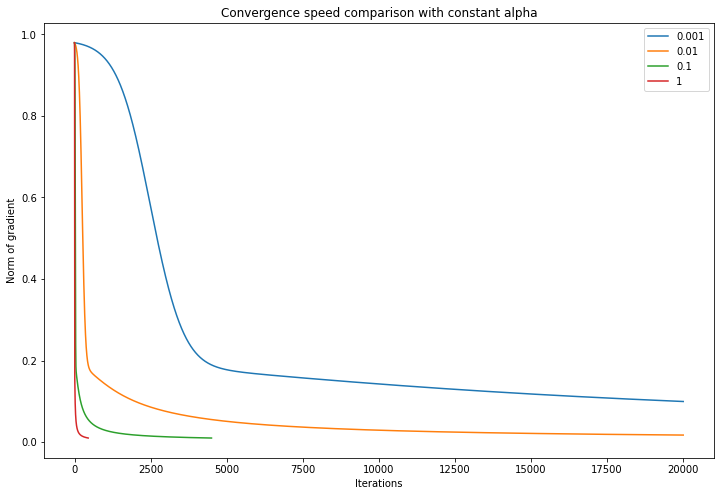

In [10]:
import time

def StepGD(X, Y, W1, alpha, epsilon=1e-2, max_iter=20000):
  W = W1
  norm_grad = np.linalg.norm(analitical_grad(X, Y, W))
  residual = [norm_grad]  
  k = 0
  while norm_grad > epsilon:
      if k % 10000 == 0:
        print(f'The step {k}, Norm of gradient {norm_grad}')      
      gr = analitical_grad(X, Y, W)  
      W = W - alpha * gr
      norm_grad = np.linalg.norm(gr)
      residual.append(norm_grad)
      if k == max_iter:
        break
      k += 1
  if norm_grad <= epsilon:
    print(f'The step {k}, Norm of gradient {norm_grad}')      
  return W, residual

alphas = [1e-3, 1e-2, 1e-1, 1]

result = []

np.random.seed(0)
W = np.random.uniform(0, 1, X.shape[1])

for alpha in alphas:
  start = time.time()
  _, residual = StepGD(X, Y, W, alpha)
  end = time.time()
  result.append([alpha, residual, start, end])

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
for i in range(len(alphas)):
  w, res, st, en = result[i]
  print(f'Time of work for aplpha={alphas[i]} = {en - st}')
  plt.plot(res, label=f'{str(alphas[i])}')
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)

plt.title('Convergence speed comparison with constant alpha')
plt.show()
  

# Solving with Armijo rule and comparison.

**Problem 3.5**

- (3 pts) Compare the obtained results with the results if Armijo rule to adapt the step size is used. Provide convergence plots and running time in seconds in all experiments.

The step 0, Norm of gradient 0.9794188141822815
The step 492, Norm of gradient 0.009991922415792942
Time of work for aplpha=0.001 = 4.875439643859863.
Time of work for aplpha=0.01 = 4.76320219039917.
Time of work for aplpha=0.1 = 1.1032216548919678.
Time of work for aplpha=1 = 0.11975407600402832.

Time of work with Armijo rule alpha = 1.395021677017212. Nuber of steps - 492 


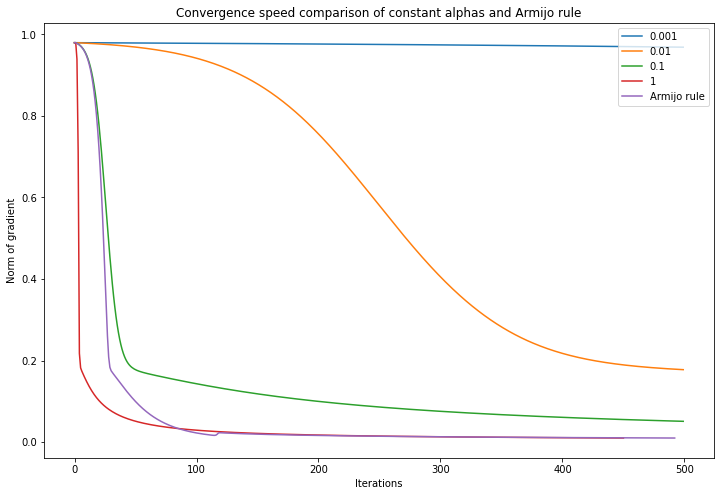

In [11]:
def GDwithArmijo(f, X, Y, W1, alpha = 0.1, epsilon=1e-2, max_iter=20000, beta = 0.2):
  W = W1  
  norm_grad = np.linalg.norm(analitical_grad(X, Y, W))
  residual = [norm_grad]  
  sigma=0.2
  k = 0     
  while norm_grad > epsilon:                            
    if k % 10000 == 0:
      print(f'The step {k}, Norm of gradient {norm_grad}')          
    gr = analitical_grad(X, Y, W)        
    d = gr/np.linalg.norm(gr)
    #print(f'd={d}')
    offset = f(X, Y, W)        
    # print(offset)
    m = 0
    condition = sigma * alpha * (beta**m) * (gr.T @ d)
    # print(condition)    
    while True:      
      # print (f'f(X, Y, W + alpha * (beta **m) * d) - offset={f(X, Y, W + alpha * (beta **m) * d) - offset}')
      if offset - f(X, Y, W - alpha * (beta **m) * d) >= -condition:                
        W = W - alpha * (beta **m) * d
        break
      else:        
        m = m + 1        
        # print(m)
    norm_grad = np.linalg.norm(gr)
    residual.append(norm_grad)
    if k == max_iter:
      break      
    k += 1  
  if norm_grad <= epsilon:
    print(f'The step {k}, Norm of gradient {norm_grad}')
  return W, residual

np.random.seed(0)
W = np.random.uniform(0, 1, X.shape[1])

start = time.time()
_, resArmijo = GDwithArmijo(log_loss, X, Y, W, 0.1, 1e-2, 10000, )
end = time.time()

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))
for i in range(len(alphas)):
  w, res, st, en = result[i]
  print(f'Time of work for aplpha={alphas[i]} = {en - st}.')
  plt.plot(res[:500], label=f'{str(alphas[i])}')
print(f'\nTime of work with Armijo rule alpha = {end - start}. Nuber of steps - 492 ')
plt.plot(resArmijo[:500], label='Armijo rule')  
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('Convergence speed comparison of constant alphas and Armijo rule')
plt.show()


# Make a conclusion on the gain ...
**Problem 3.6**
-  (2 pts) Make a conclusion on the gain that can be established by the proper adaptive step size selection rules 

**Conclusion on the gain:**
The Armijo rule has 3 parameters.
As we can see in the graphs below, and in the case of the Armijo rule, the convergence rate depends very much on the initial alpha value, although less significantly than when choosing a constant alpha.
The algorithm is less sensitive to the choice of the parameter beta (0.1).

And with Armijo rule - computation time can increase significantly.

The step 0, Norm of gradient 0.9794188141822815
The step 10000, Norm of gradient 0.02179243415594101
Time of work for aplpha=0.001 = 18.87537384033203.
The step 0, Norm of gradient 0.9794188141822815
The step 1426, Norm of gradient 0.009989164769649506
Time of work for aplpha=0.01 = 2.7219607830047607.
The step 0, Norm of gradient 0.9794188141822815
The step 492, Norm of gradient 0.009991922415792942
Time of work for aplpha=0.1 = 0.9429361820220947.
The step 0, Norm of gradient 0.9794188141822815
The step 756, Norm of gradient 0.008230982348322868
Time of work for aplpha=1 = 1.612947702407837.
The step 0, Norm of gradient 0.9794188141822815
The step 913, Norm of gradient 0.00497183483093977
Time of work for aplpha=2 = 2.605325937271118.


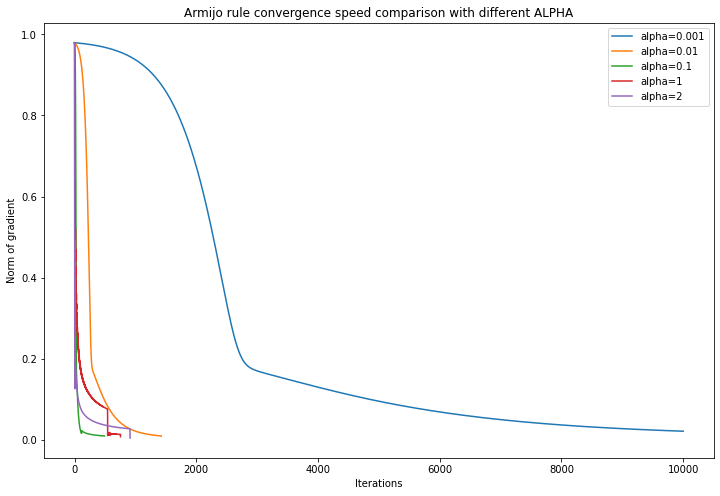

In [12]:
alphas = [1e-3, 1e-2, 1e-1, 1, 2]

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for i in range(len(alphas)):
  np.random.seed(0)
  W = np.random.uniform(0, 1, X.shape[1])
  
  start = time.time()
  _, resArmijo = GDwithArmijo(log_loss, X, Y, W, alphas[i], 1e-2, 10000)
  end = time.time()

  print(f'Time of work for aplpha={alphas[i]} = {end - start}.')
  plt.plot(resArmijo, label=f'alpha={str(alphas[i])}')
  resArmijo=[]  
  
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('Armijo rule convergence speed comparison with different ALPHA')
plt.show()

The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.1 = 0.9980547428131104.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.2 = 0.9694957733154297.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.3 = 1.444507122039795.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.4 = 0.9405570030212402.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.5 = 1.4615647792816162.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.6 = 1.428149938583374.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.7 = 0.944103479385376.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.8 = 0.9462447166442871.
The step 0, Norm of gradient 0.9794188141822815
Time of work for beta=0.9 = 0.9604814052581787.


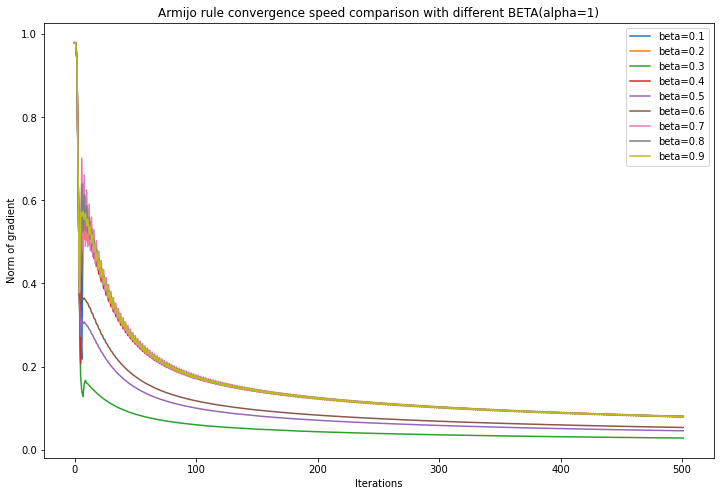

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 8))

for i in range(1,10,1):
  beta = i/10
  np.random.seed(0)
  W = np.random.uniform(0, 1, X.shape[1])
  
  start = time.time()
  _, resArmijo = GDwithArmijo(log_loss, X, Y, W, 1, 1e-2, 500, beta)
  end = time.time()

  print(f'Time of work for beta={beta} = {end - start}.')
  plt.plot(resArmijo, label=f'beta={str(beta)}')  
  resArmijo=[]
  
plt.xlabel("Iterations")
plt.ylabel('Norm of gradient')
plt.legend(loc=1)
plt.title('Armijo rule convergence speed comparison with different BETA(alpha=1)')
plt.show()